In [1]:
import os
import gc
import sys

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 140)
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
sns.set_style('darkgrid')

from sklearn.preprocessing import StandardScaler as scale
from sklearn.decomposition import PCA
from sklearn.cluster import k_means
from sklearn.model_selection import train_test_split as split 
from sklearn.model_selection import GridSearchCV as Grid
import xgboost as xgb
from sklearn.metrics import (roc_auc_score, precision_score, recall_score, f1_score,
                             confusion_matrix, accuracy_score, roc_curve, auc)

In [2]:
df = pd.read_csv('../data/train.csv')

In [3]:
#saving the original dataset length
org_len = len(df)
df.head(2)

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
0,0,0.000000,0.009916,0.014079,0.008773,0.001390,0.006270,1,-1.872746,-2.191242,-0.474163,-0.323046,0.014688,-0.002484,NaN,NaN,-0.989982,-1.055090,NaN,NaN,-2.667671,-2.001475,-1.703595,-2.196892,NaN,NaN,1.483295,1.307466,NaN,NaN,1.175200,0.967805,1.60841,1.319365,NaN,NaN,-0.515073,-0.448988,NaN,NaN,-2.429812,-2.206423,-3.593120,-2.868358,0.112697,0.053157,-0.539956,-0.692187,3.491282,-1.684889,1.337123,-0.328607,1.689207,-1.052243,-1.870885,-1.789342,-1.574173,-1.120820,-0.571920,-1.093033,0.703515,5.936281,NaN,3.315812,1.291338,2.468825,2.490069,-1.148239,-0.961935,-2.263944,-2.158765,-5.012022,-2.006825,-1.284090,-2.141697,-2.054935,-1.851203,-1.431184,-1.634481,NaN,-0.373934,NaN,0.559241,0.891368,0.27170,NaN,-1.521125,NaN,3.045337,3.260512,0.683558,NaN,-0.109194,NaN,0.488806,1.447504,-2.790902,NaN,1.158770,NaN,3.754522,7.137163,-1.863069,NaN,0.434466,NaN,-0.292035,0.317003,-2.605820,NaN,2.896986,NaN,1.485813,4.147254,-2.238831,NaN,-0.892724,NaN,-0.156332,0.622816,-3.921523,NaN,2.561593,NaN,3.457757,6.649580,-1.472686,NaN,NaN,1.168391,8.313583,1.782433,14.018213,2.653056,12.600292,2.301488,11.445807,0
1,0,16.673515,-0.002828,-0.003226,-0.007319,-0.011114,-0.009792,-1,-1.349537,-1.704709,0.068058,0.028432,0.193794,0.138212,NaN,NaN,-0.151877,-0.384952,NaN,NaN,1.225838,0.789076,1.110580,1.102281,NaN,NaN,-0.590600,-0.625682,NaN,NaN,-0.543425,-0.547486,-0.70660,-0.667806,NaN,NaN,0.910558,0.914465,NaN,NaN,2.137454,2.080459,2.819291,2.483965,-0.086755,-0.082687,0.368431,0.469196,5.711996,-2.215132,0.796703,-1.140081,0.716617,-0.059431,-0.198920,-0.326697,-0.381770,1.435607,3.401393,2.486748,-2.014598,-0.390588,NaN,-0.027262,-1.886927,-1.706450,-0.888236,-1.138294,-0.954461,-1.350633,-1.459546,-4.564815,-2.651966,-1.620014,-2.240625,-2.147273,-0.255224,3.202946,-0.535872,NaN,-0.050948,NaN,0.141089,0.058363,0.13119,NaN,-0.121239,NaN,0.677553,0.045842,-0.124616,NaN,-0.007004,NaN,-0.410491,-0.024323,-3.012654,NaN,1.157671,NaN,1.297679,1.281956,-2.427595,NaN,0.024913,NaN,-0.413607,-0.073672,-2.434546,NaN,0.949879,NaN,0.724655,1.622137,-2.209020,NaN,-1.332492,NaN,-0.586619,-1.040491,-3.946097,NaN,0.983440,NaN,1.357907,1.612348,-1.664544,NaN,NaN,-1.178850,1.777472,-0.915458,2.831612,-1.417010,2.297459,-1.304614,1.898684,1


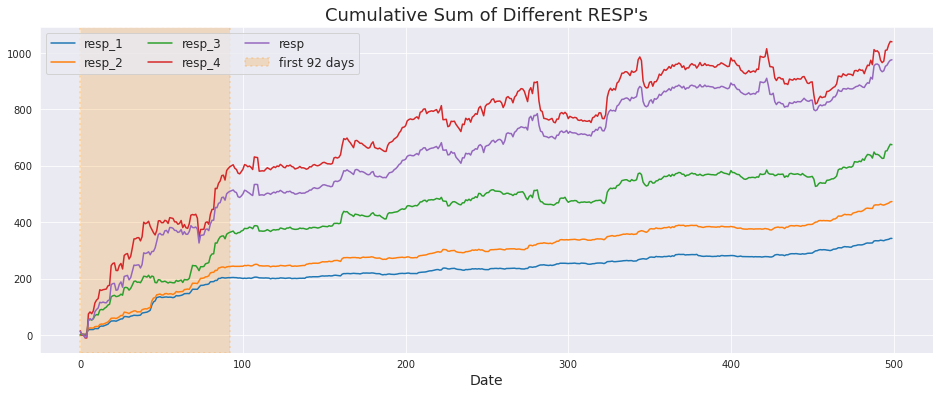

In [11]:
fig = plt.figure(figsize=(16,6))
ax = plt.subplot(1,1,1)
df.groupby('date')[['resp_1', 'resp_2', 'resp_3', 'resp_4', 'resp']].sum().cumsum().plot(ax=ax)
plt.title('Cumulative Sum of Different RESP\'s',fontsize=18)
plt.xlabel('Date',fontsize=14)
plt.axvspan(0,92,linestyle=':',linewidth=2,label='first 92 days',color='darkorange',alpha=.2)
plt.legend(fontsize=12,ncol=3,loc=2);

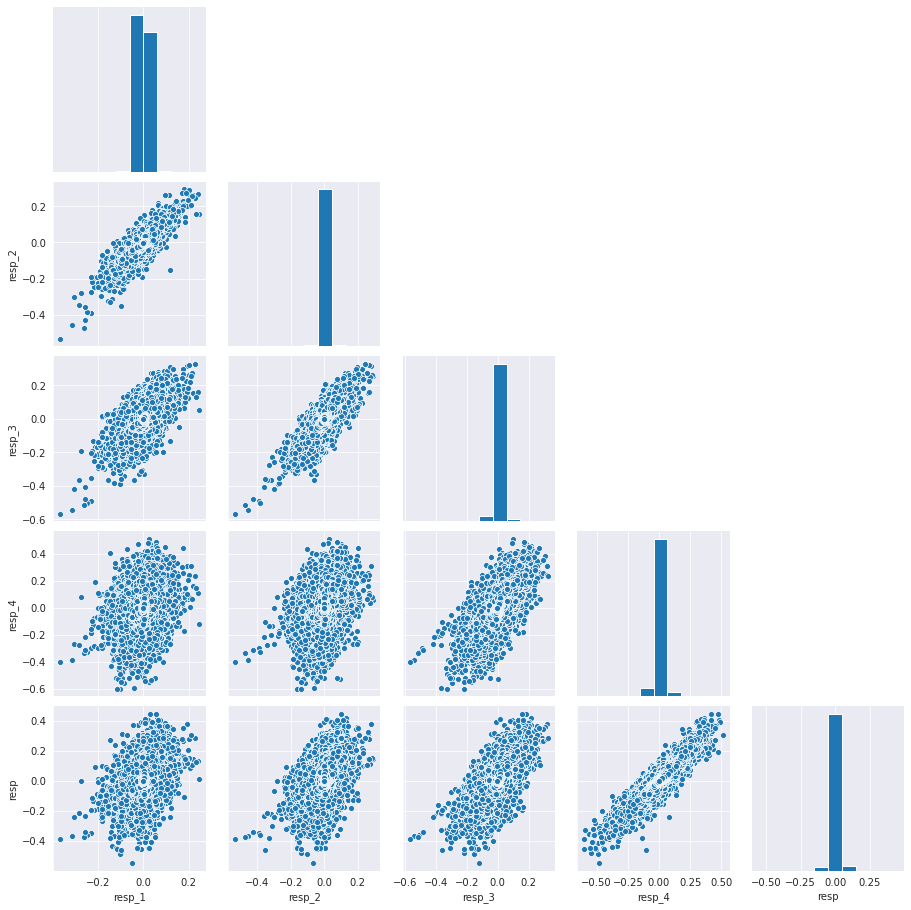

In [14]:
sns.pairplot(df[['resp_1', 'resp_2', 'resp_3', 'resp_4', 'resp']],corner=True);

<a id='date'></a>
## **Date**

### Checking the unique values of date

In [15]:
df.date.unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

<a id='weight'></a>
## **Weight**

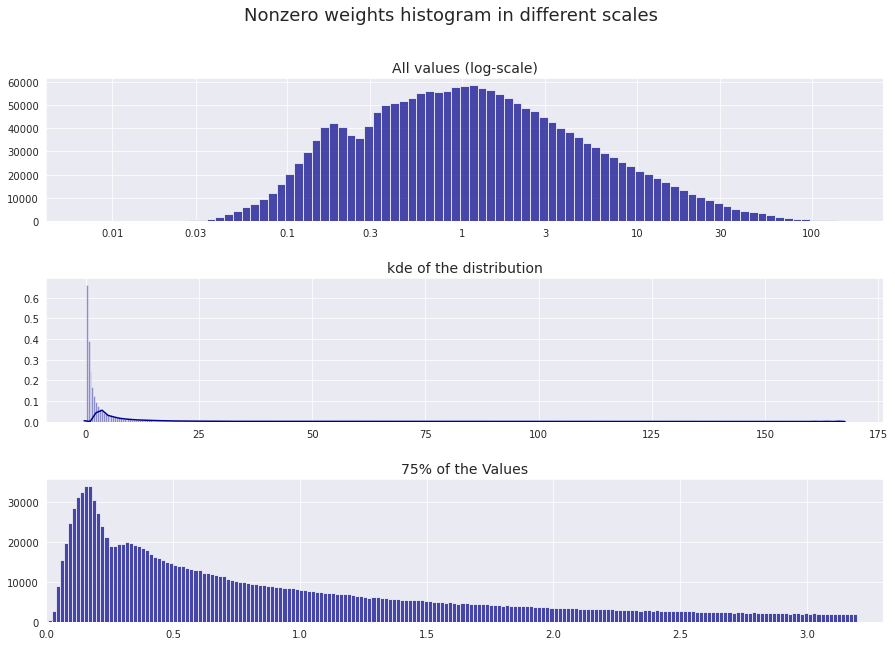

In [22]:
fig = plt.figure(figsize=(15,10))
fig.suptitle('Nonzero weights histogram in different scales',fontsize=18)
ax1 = plt.subplot(3,1,1)
ax1.hist(df.weight[df.weight !=0],color='darkblue',alpha=.7, bins=10**np.arange(-2.16,2.23,.05))
plt.xscale('log')
plt.xticks((.01,.03,.1,.3,1,3,10,30,100),(.01,.03,.1,.3,1,3,10,30,100))
ax2 = plt.subplot(3,1,2)
sns.distplot(df.weight[df.weight != 0], color='darkblue', bins=400, ax=ax2) 
ax3 = plt.subplot(3,1,3)
ax3.hist(df.weight[(df.weight !=0) & (df.weight < 3.197 )],color='darkblue',alpha=.7, bins=200)
ax3.set_xlim(0,3.3)
ax2.set_xlabel('') 
ax1.set_title('All values (log-scale)',fontsize=14)
ax2.set_title('kde of the distribution',fontsize=14)
ax3.set_title('75% of the Values',fontsize=14)
plt.subplots_adjust(hspace=.4);

<a id='multicollinearity'></a>
## Correlation between features

In [36]:
corr = df.iloc[:,7:-2].corr()

In [37]:
corr.style.background_gradient(cmap='coolwarm')

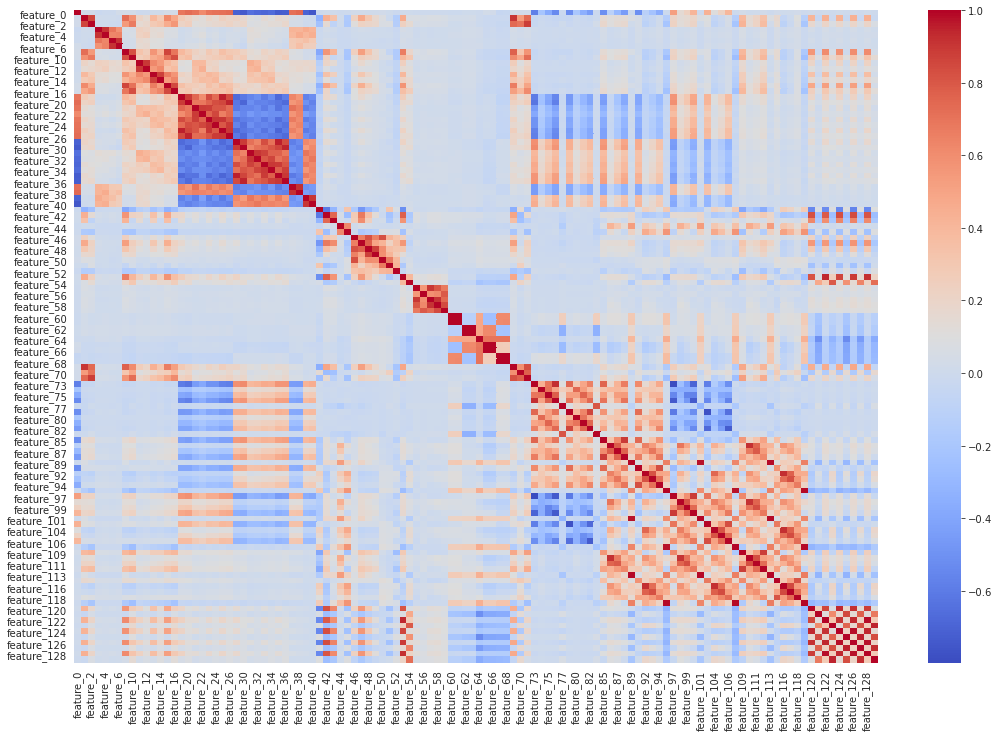

In [38]:
fig = plt.figure(figsize=(18,12))
ax = plt.subplot(1,1,1)
sns.heatmap(corr,ax= ax, cmap='coolwarm');

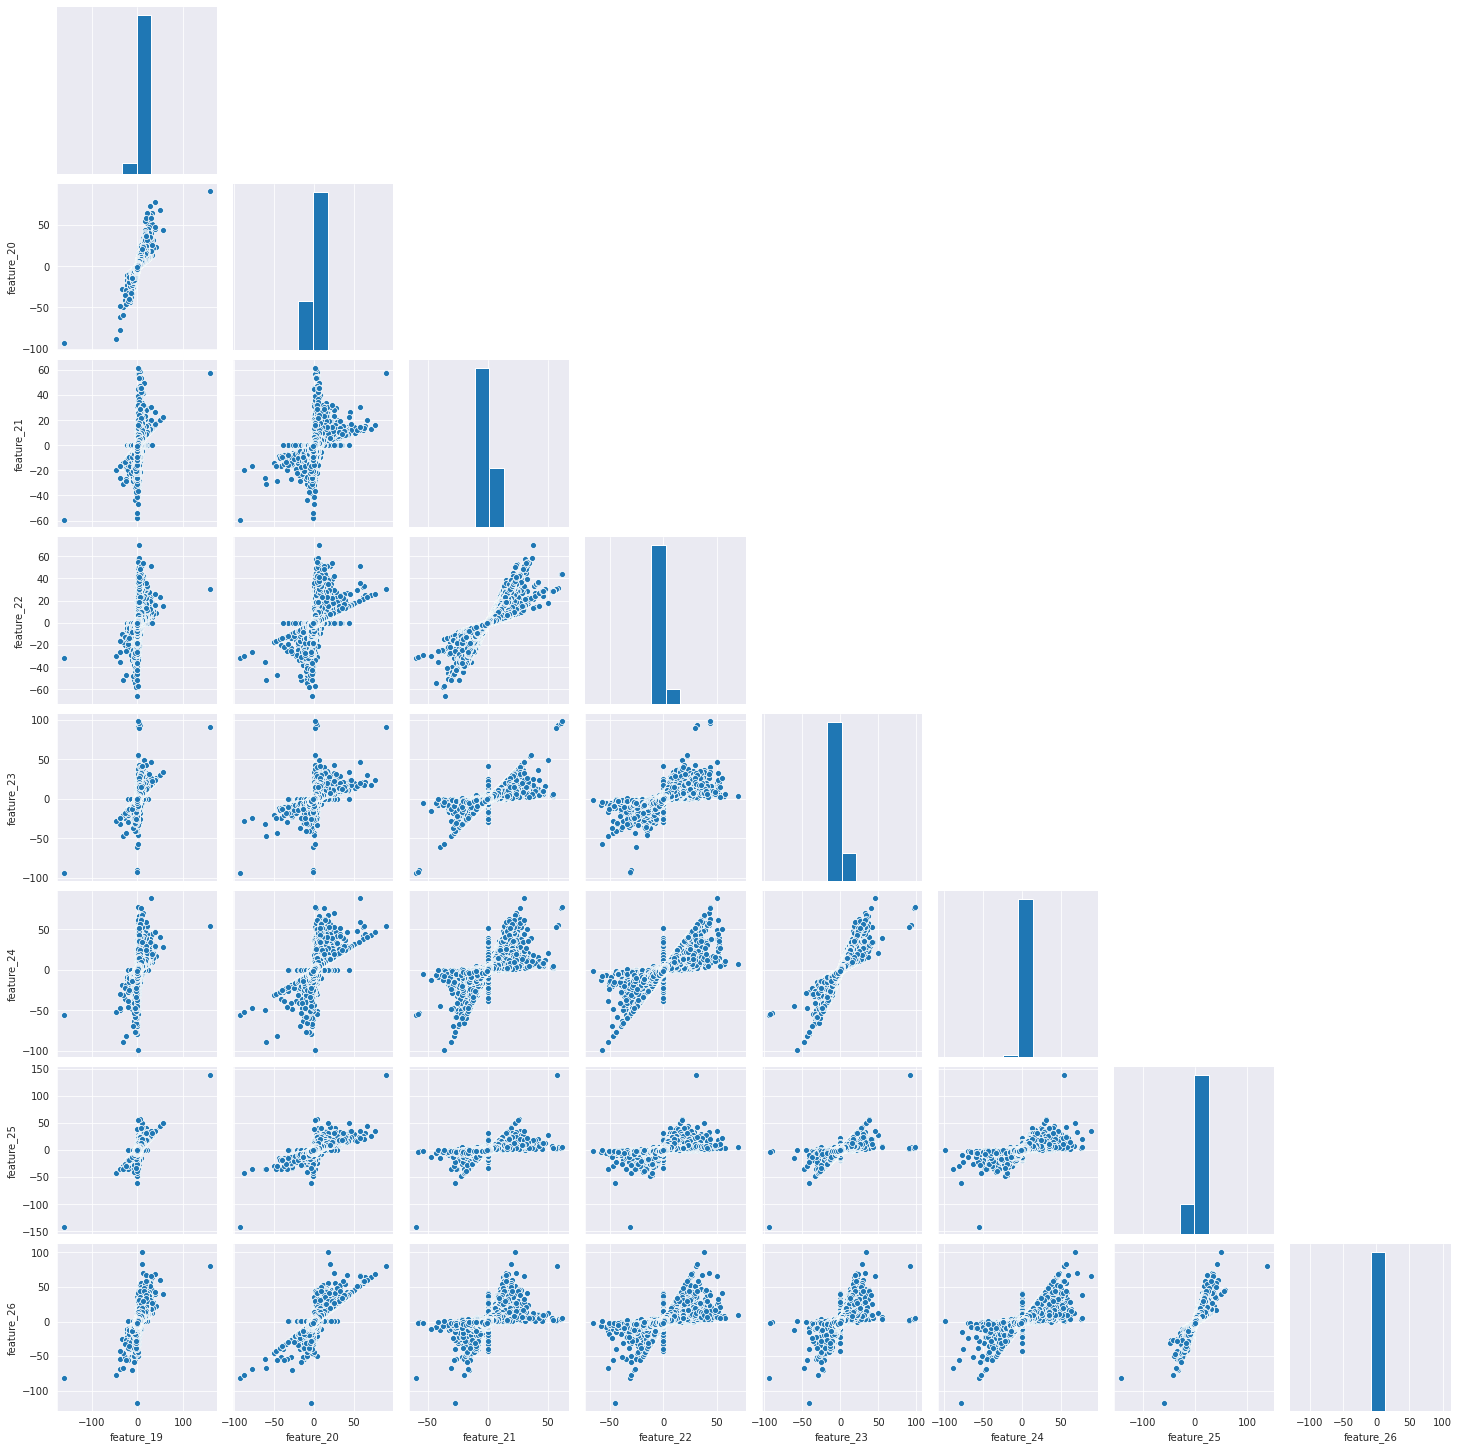

In [42]:
sns.pairplot(df[featstr2[15:23]],corner=True);

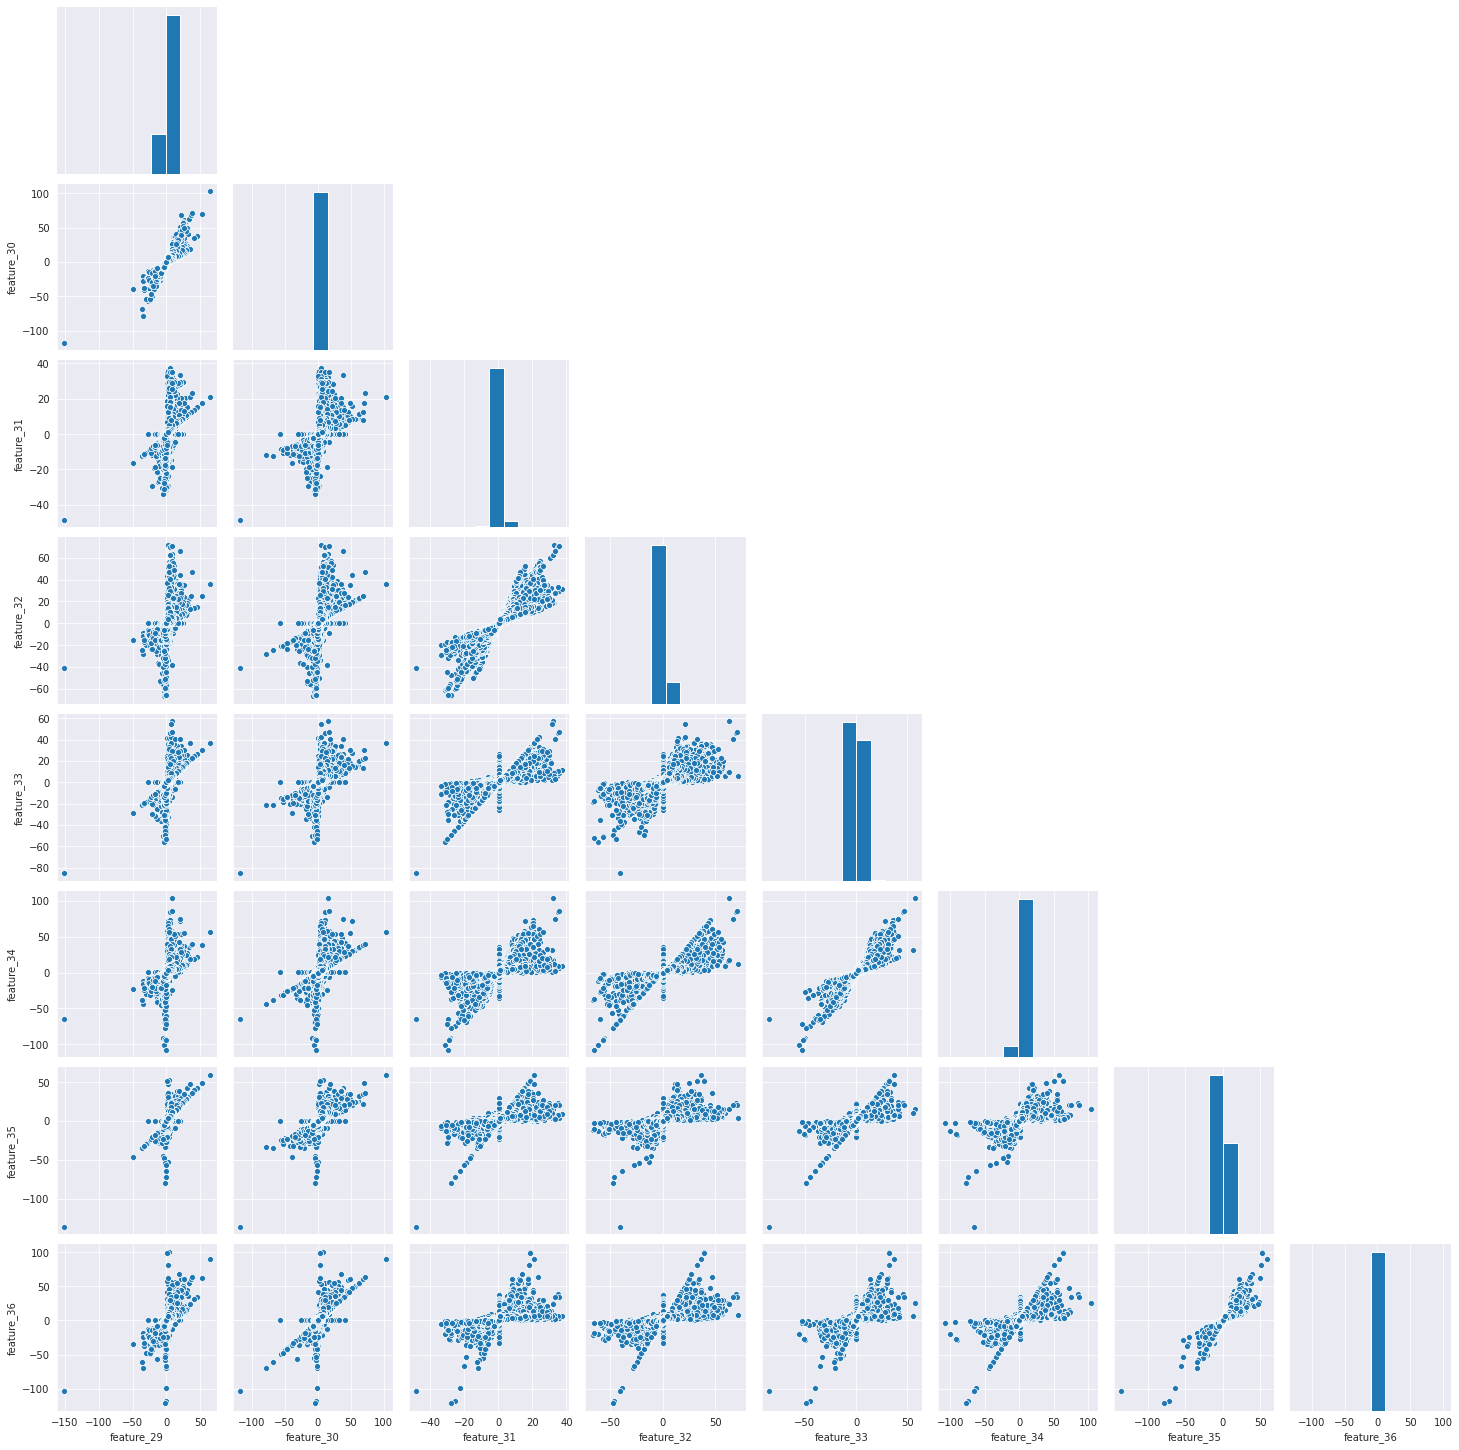

In [44]:
sns.pairplot(df[featstr2[23:31]],corner=True);

<a id='pcacls'></a>
# PCA & Clustering

In [69]:
scaler = scale()

In [70]:
scaler.fit(df[featstr[1:]])

StandardScaler()

In [71]:
df_pca = pd.DataFrame(scaler.transform(df[featstr[1:]]))
df_pca.columns = featstr[1:]
gc.collect()
df_pca.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_73,feature_74,feature_75,feature_76,feature_77,feature_79,feature_80,feature_81,feature_82,feature_83,feature_85,feature_86,feature_87,feature_88,feature_89,feature_91,feature_92,feature_93,feature_94,feature_95,feature_97,feature_98,feature_99,feature_100,feature_101,feature_103,feature_104,feature_105,feature_106,feature_107,feature_109,feature_110,feature_111,feature_112,feature_113,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129
0,-0.705620,-0.886935,0.035678,0.018636,0.124403,0.098698,-0.158282,-0.351185,0.00863,0.010137,0.566505,0.445341,0.568889,0.515364,-0.556548,-0.494793,0.005019,0.007876,-0.416808,-0.334266,-0.522668,-0.444666,0.385702,0.312902,0.005717,0.00654,1.097327,1.020331,1.136116,1.053624,-0.059686,-0.051043,0.222802,0.194668,2.764669,-1.084747,0.210182,-0.614960,0.210441,-0.257862,-0.235142,-0.354395,-0.436495,0.494470,1.467344,1.323281,-1.122460,-0.410927,0.070547,-0.136764,-0.685120,-0.583399,-0.343245,-0.755971,-0.750104,-0.867505,-0.883464,-2.117755,-1.506841,-1.284700,-1.106416,-1.096616,-0.269076,1.314753,-0.499301,-0.011090,0.004677,0.102747,0.044628,0.083073,-0.060698,0.004251,0.377516,0.049282,-0.021410,-0.220935,0.114533,-0.317607,-0.185933,-1.650392,0.306361,0.081722,0.597565,0.581721,-1.204883,-0.199475,0.104832,-0.467626,-0.249695,-1.436121,0.302836,0.083787,0.286452,0.595217,-1.115962,-0.724922,0.124397,-0.625037,-0.593256,-1.889790,0.369521,0.082309,0.553945,0.729188,-1.085875,0.026383,0.010769,-0.733738,0.880513,-0.731685,1.229657,-0.693402,1.263759,-0.714841,1.064481
1,0.205924,-0.245564,0.447937,0.249128,-0.376431,-0.216937,2.387436,1.685651,0.00863,0.010137,1.899495,1.298765,2.263626,1.517167,-0.912206,-0.696217,0.005019,0.007876,-0.745972,-0.517424,-0.910856,-0.656777,3.055536,2.093286,0.005717,0.00654,2.339837,1.651974,2.576559,1.867342,-0.102592,-0.072024,0.478723,0.307525,-0.255555,-0.055427,0.878437,-0.049803,-0.081228,-0.429965,-0.206131,-0.447766,-0.608211,-0.450305,-0.587897,-0.258625,1.023086,1.926027,0.070547,0.125591,-0.144644,0.069616,0.147173,-0.751604,-0.746044,-0.923594,-0.944146,-2.024463,-1.333647,-1.168245,-1.077433,-1.068566,0.175249,0.113500,-0.355312,-0.222909,0.004677,0.095123,-0.203464,0.140010,-0.285671,0.004251,0.113148,-0.256518,0.168339,0.353890,0.114533,0.132268,0.252348,-1.584233,0.844464,0.081722,0.311777,0.498132,-1.550603,0.486599,0.104832,-0.058544,0.308122,-1.564159,1.003198,0.083787,0.169104,0.839871,-1.717132,0.391588,0.124397,-0.105185,0.254284,-1.954805,1.184894,0.082309,0.324008,0.837945,-1.504641,0.026383,0.010769,2.968289,5.306682,3.207921,5.371141,2.900483,5.905723,2.908241,5.739533
2,0.358359,0.020448,0.035016,0.006810,-0.619531,-0.422867,1.960104,1.563047,0.00863,0.010137,1.422487,1.063648,1.832677,1.415565,-1.080547,-0.951088,0.005019,0.007876,-0.887246,-0.745072,-1.085259,-0.921712,2.824430,2.205148,0.005717,0.00654,1.806717,1.423642,2.400570,1.965908,-0.121215,-0.098471,0.406750,0.297855,-0.554271,1.029777,0.586625,-0.036793,-0.605383,-0.237437,0.273425,0.010808,-0.198355,-0.543187,-0.462955,-0.258625,1.313788,0.291138,0.070547,0.036485,-0.094809,0.130807,0.104745,-0.750868,-0.745408,-0.898093,-0.915835,-2.014

In [72]:
pca =  PCA(n_components= 8).fit(df_pca)

In [73]:
df_pca = pd.DataFrame(pca.transform(df_pca))

In [74]:
pcs = ['pc'+str(i+1) for i in range(8)]

In [75]:
df_pca.columns = pcs
df_pca['action'] = df.action.values
df_pca['weight'] = df.weight.values
df_pca['resp'] = df.resp.values
df_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,action,weight,resp
0,-1.765658,-1.382862,-2.151788,4.542051,-2.111947,-0.641712,0.237551,1.527585,0,16.673515,-0.009792
1,-2.417151,6.772670,-4.544094,9.477030,0.528396,-2.652668,-0.053054,0.077143,1,0.000000,0.023970
2,-5.302724,6.154205,-3.402425,2.820056,-0.024281,0.291339,0.855223,-0.972708,0,0.000000,-0.003200
3,1.195458,-1.437823,-2.152746,6.075926,0.155102,2.028281,-0.797506,-1.333146,0,0.138531,-0.002604
4,-5.231357,-3.518538,-0.877994,6.765567,1.195729,0.353828,1.984004,-1.689549,1,0.000000,0.001282


### Exploring correlation in the PCA dataframe

In [76]:
df_pca.corr().style.background_gradient(cmap='coolwarm')

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,weight,resp
pc1,1.000000,-0.000001,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.010437,-0.020088
pc2,-0.000001,1.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.098692,0.019779
pc3,0.000000,0.000000,1.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.086529,0.003430
pc4,-0.000000,0.000000,-0.000000,1.000000,0.000000,-0.000000,0.000000,-0.000000,0.018307,-0.002095
pc5,-0.000000,0.000000,0.000000,0.000000,1.000000,-0.000000,0.000000,-0.000000,-0.191382,0.008568
pc6,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,1.000000,0.000000,-0.000000,0.024626,-0.019170
pc7,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,1.000000,0.000001,-0.024915,-0.001266
pc8,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000001,1.000000,0.437807,-0.005596
weight,-0.010437,-0.098692,0.086529,0.018307,-0.191382,0.024626,-0.024915,0.437807,1.000000,-0.006806
resp,-0.020088,0.019779,0.003430,-0.002095,0.008568,-0.019170,-0.001266,-0.005596,-0.006806,1.000000


In [77]:
kmeans = k_means(n_clusters= 8, max_iter= 400, random_state= 0,X=df_pca[pcs])

In [78]:
df_pca['cluster'] = kmeans[1]
df_pca['cluster'] = df_pca['cluster'].astype('category')
df_pca.head(8)

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,action,weight,resp,cluster
0,-1.765658,-1.382862,-2.151788,4.542051,-2.111947,-0.641712,0.237551,1.527585,0,16.673515,-0.009792,4
1,-2.417151,6.772670,-4.544094,9.477030,0.528396,-2.652668,-0.053054,0.077143,1,0.000000,0.023970,0
2,-5.302724,6.154205,-3.402425,2.820056,-0.024281,0.291339,0.855223,-0.972708,0,0.000000,-0.003200,0
3,1.195458,-1.437823,-2.152746,6.075926,0.155102,2.028281,-0.797506,-1.333146,0,0.138531,-0.002604,4
4,-5.231357,-3.518538,-0.877994,6.765567,1.195729,0.353828,1.984004,-1.689549,1,0.000000,0.001282,4
5,-5.308368,-4.315912,-0.858290,6.528217,1.760613,0.440756,2.152855,-1.920092,1,0.190575,0.000709,4
6,-3.257573,1.461665,-5.551630,4.914343,2.020406,-0.960687,-0.840190,1.996479,1,3.820844,0.033473,0
7,0.640045,-4.287179,-6.714078,4.914511,3.428105,1.156852,0.701419,-2.159919,0,0.116557,-0.001677,4
